In [59]:
#Cryptocurrency to examine: BTC to USD from the bitsamp exchange
from_symbol = 'BTC'
to_symbol = 'USDT'
exchange = 'Binance'
datetime_interval = 'day'

In [60]:
import requests
import pandas as pd
from datetime import datetime
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

#Create Filename for data
def create_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

#Get the data from cryptocompare.com
def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals
    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)
    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 1000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data

#Convert to a pandas dataframe
def convert_to_dataframe(data):
    df = pd.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df

data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
df = convert_to_dataframe(data)

current_datetime = datetime.now().date().isoformat()
filename = create_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
df.to_csv(filename, index=False)

Saving data to BTC_USDT_Binance_day_2022-05-01.csv


In [65]:
df = pd.read_csv('C://Users/Nikolay/Desktop/IT/Data_Science/Stock_prediction/BTC_USDT_Binance_day_2022-05-01.csv')

In [66]:
df

,Date,Low,High,Open,Close,Volumefrom,Volumeto
0,2019-08-05,10927.80,11937.52,10929.23,11828.80,59656.47,6.940276e+08
1,2019-08-06,11226.70,12330.70,11828.80,11481.69,69745.18,8.221001e+08
2,2019-08-07,11382.84,12141.17,11481.69,11975.03,63842.27,7.517573e+08
3,2019-08-08,11521.00,12060.00,11975.03,11999.77,47773.39,5.638807e+08
4,2019-08-09,11700.00,12045.68,11999.77,11879.99,36781.90,4.356917e+08
...,...,...,...,...,...,...,...
996,2022-04-27,37881.31,39474.72,38112.65,39235.72,57083.12,2.218524e+09
997,2022-04-28,38881.43,40372.63,39235.72,39742.07,56046.07,2.222203e+09
998,2022-04-29,38175.00,39925.25,39742.07,38596.11,51453.66,2.006136e+09
999,2022-04-30,37578.20,38795.38,38596.11,37630.80,35321.19,1.354901e+09


In [67]:
from pandas.tseries.offsets import BDay
df['Date'] =pd.to_datetime(df['Date'])
df.index= df['Date']
df = df.drop(['Date'], axis = 1)

In [71]:
df

,Low,High,Open,Close,Volumefrom,Volumeto
Date,,,,,,
2019-08-05,10927.80,11937.52,10929.23,11828.80,59656.47,6.940276e+08
2019-08-06,11226.70,12330.70,11828.80,11481.69,69745.18,8.221001e+08
2019-08-07,11382.84,12141.17,11481.69,11975.03,63842.27,7.517573e+08
2019-08-08,11521.00,12060.00,11975.03,11999.77,47773.39,5.638807e+08
2019-08-09,11700.00,12045.68,11999.77,11879.99,36781.90,4.356917e+08
...,...,...,...,...,...,...
2022-04-27,37881.31,39474.72,38112.65,39235.72,57083.12,2.218524e+09
2022-04-28,38881.43,40372.63,39235.72,39742.07,56046.07,2.222203e+09
2022-04-29,38175.00,39925.25,39742.07,38596.11,51453.66,2.006136e+09


In [72]:
df.iloc[:, 3:4]

,Close
Date,
2019-08-05,11828.80
2019-08-06,11481.69
2019-08-07,11975.03
2019-08-08,11999.77
2019-08-09,11879.99
...,...
2022-04-27,39235.72
2022-04-28,39742.07
2022-04-29,38596.11


In [73]:
train_size=int(len(df) * 0.8)
test_size = int(len(df)) - train_size
print(train_size)

800


In [74]:
train_data = df[:train_size]
test_data = df[train_size:]

In [75]:
training_set = train_data.iloc[:, 3:4].values

In [76]:
training_set

array([[11828.8 ],
       [11481.69],
       [11975.03],
       [11999.77],
       [11879.99],
       [11309.31],
       [11549.97],
       [11396.08],
       [10892.71],
       [10050.37],
       [10293.93],
       [10331.54],
       [10216.02],
       [10306.78],
       [10915.54],
       [10760.51],
       [10142.57],
       [10099.88],
       [10389.55],
       [10134.35],
       [10142.69],
       [10372.25],
       [10185.05],
       [ 9721.  ],
       [ 9498.44],
       [ 9584.54],
       [ 9587.47],
       [ 9724.98],
       [10340.  ],
       [10615.28],
       [10567.02],
       [10564.49],
       [10298.73],
       [10455.88],
       [10381.18],
       [10303.12],
       [10098.15],
       [10158.33],
       [10415.01],
       [10342.06],
       [10335.02],
       [10302.01],
       [10251.31],
       [10187.82],
       [10156.99],
       [10244.29],
       [10168.59],
       [ 9986.39],
       [10028.87],
       [ 9702.25],
       [ 8694.23],
       [ 8430.05],
       [ 806

In [77]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [78]:
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [79]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [80]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train,y_train,epochs=50,batch_size=16)

Epoch 1/50
47/47 [==============================] - 5s 53ms/step - loss: 0.0264
Epoch 2/50
47/47 [==============================] - 3s 54ms/step - loss: 0.0061
Epoch 3/50
47/47 [==============================] - 3s 55ms/step - loss: 0.0054
Epoch 4/50
47/47 [==============================] - 3s 54ms/step - loss: 0.0052
Epoch 5/50
47/47 [==============================] - 3s 53ms/step - loss: 0.0052
Epoch 6/50
47/47 [==============================] - 3s 58ms/step - loss: 0.0057
Epoch 7/50
47/47 [==============================] - 3s 59ms/step - loss: 0.0047
Epoch 8/50
47/47 [==============================] - 3s 58ms/step - loss: 0.0042
Epoch 9/50
47/47 [==============================] - 3s 59ms/step - loss: 0.0043
Epoch 10/50
47/47 [==============================] - 3s 56ms/step - loss: 0.0039
Epoch 11/50
47/47 [==============================] - 3s 56ms/step - loss: 0.0037
Epoch 12/50
47/47 [==============================] - 3s 63ms/step - loss: 0.0046
Epoch 13/50
47/47 [==================

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_4 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100)              

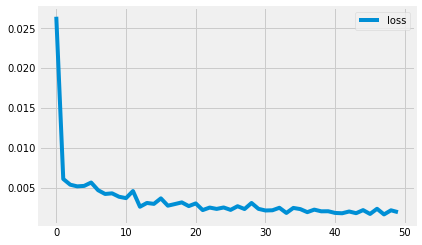

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [98]:
real_price = test_data.iloc[:, 3:4].values

In [99]:
dataset_total = pd.concat((train_data['Close'], test_data['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 250):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

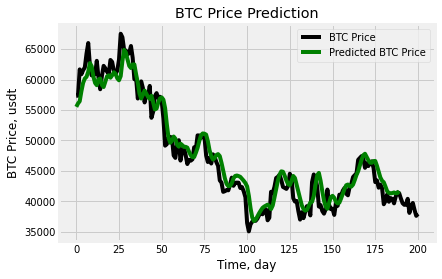

In [100]:
plt.plot(real_price, color = 'black', label = 'BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time, day')
plt.ylabel('BTC Price, usdt')
plt.legend()
plt.show()

In [101]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predicted_price.astype(float), real_price[:190].astype(float))
error

array([2163.83606364])

In [102]:
rms=np.sqrt(np.mean(np.power((real_price[:190].astype(float)-predicted_price.astype(float)),2)))
rms

2163.8360636423386

In [103]:
testActual_df = pd.DataFrame(real_price[:190])
testActual_df.rename(columns={0:'Real'}, inplace=True)


testPredict_df = pd.DataFrame(predicted_price)
testPredict_df.rename(columns={0:'Pred'}, inplace=True)

In [104]:
absolute_val = pd.concat([testActual_df, testPredict_df], axis=1)
absolute_val['Dif'] = absolute_val.Real - absolute_val.Pred
absolute_val

,Real,Pred,Dif
0,57367.00,55526.175781,1840.824219
1,57347.94,56073.968750,1273.971250
2,61672.42,56443.652344,5228.767656
3,60875.57,58088.449219,2787.120781
4,61528.33,59455.093750,2073.236250
...,...,...,...
185,40378.71,41372.667969,-993.957969
186,39678.12,41461.714844,-1783.594844
187,40801.13,41340.812500,-539.682500
188,41493.18,41359.640625,133.539375


In [108]:
std = np.sqrt(np.mean((real_price[:190] - predicted_price)**2))
mean_p = np.mean(real_price[:190])
print(std/mean_p*100)

4.530058094706195


In [109]:
d_mean = np.mean(np.abs(real_price[:190] - predicted_price))
print(d_mean)

1674.284408717105


In [110]:
d_max = np.max(np.abs(real_price[:190] - predicted_price))
print(d_max)

6959.423750000002


In [111]:
average_daily = np.mean(np.abs(real_price[:190] - predicted_price)/real_price[:190])
print(average_daily*100)

3.5958188658131927
